### Start by downloading a bathymetry data file from the Global Multi-Resolution Topography repository, which essentially synthesizes all the topography information for the globe into one database.

### You can query this database by downloading a grid of topography with given latitude and longitude boundaries.

### Bathymetry = Seafloor Topography!!!

In [3]:
# Urllib is a built in library in python
import urllib.request 

#### Specify which coordinates you want your grid to be for!

In [1]:
minlat = 40
maxlat = 44
minlon = -131 
maxlon = -123

In [10]:
# Build the URL
url = 'https://www.gmrt.org/services/GridServer?north=' + str(maxlat) + '&west=' + str(minlon) + '&east=' + str(maxlon) + '&south=' + str(minlat) + '&layer=topo&format=netcdf&resolution=high' 
print(url)

https://www.gmrt.org/services/GridServer?north=44&west=-131&east=-123&south=40&layer=topo&format=netcdf&resolution=high


In [11]:
urllib.request.urlretrieve(url,'gorda_bathy.nc')

('gorda_bathy.nc', <http.client.HTTPMessage at 0x1396ac670>)

#### Great, now we have our datafile. Let's try to plot it up.

In [2]:
import pygmt

Slab depth:
https://www.sciencebase.gov/catalog/item/5aa312cde4b0b1c392ea3ef5

In [31]:
topo_data = 'gorda_bathy.nc'
age_data = 'age.2020.1.GeeK2007.6m.nc'
slab_data = 'cas_slab2_dep_02.24.18.grd'

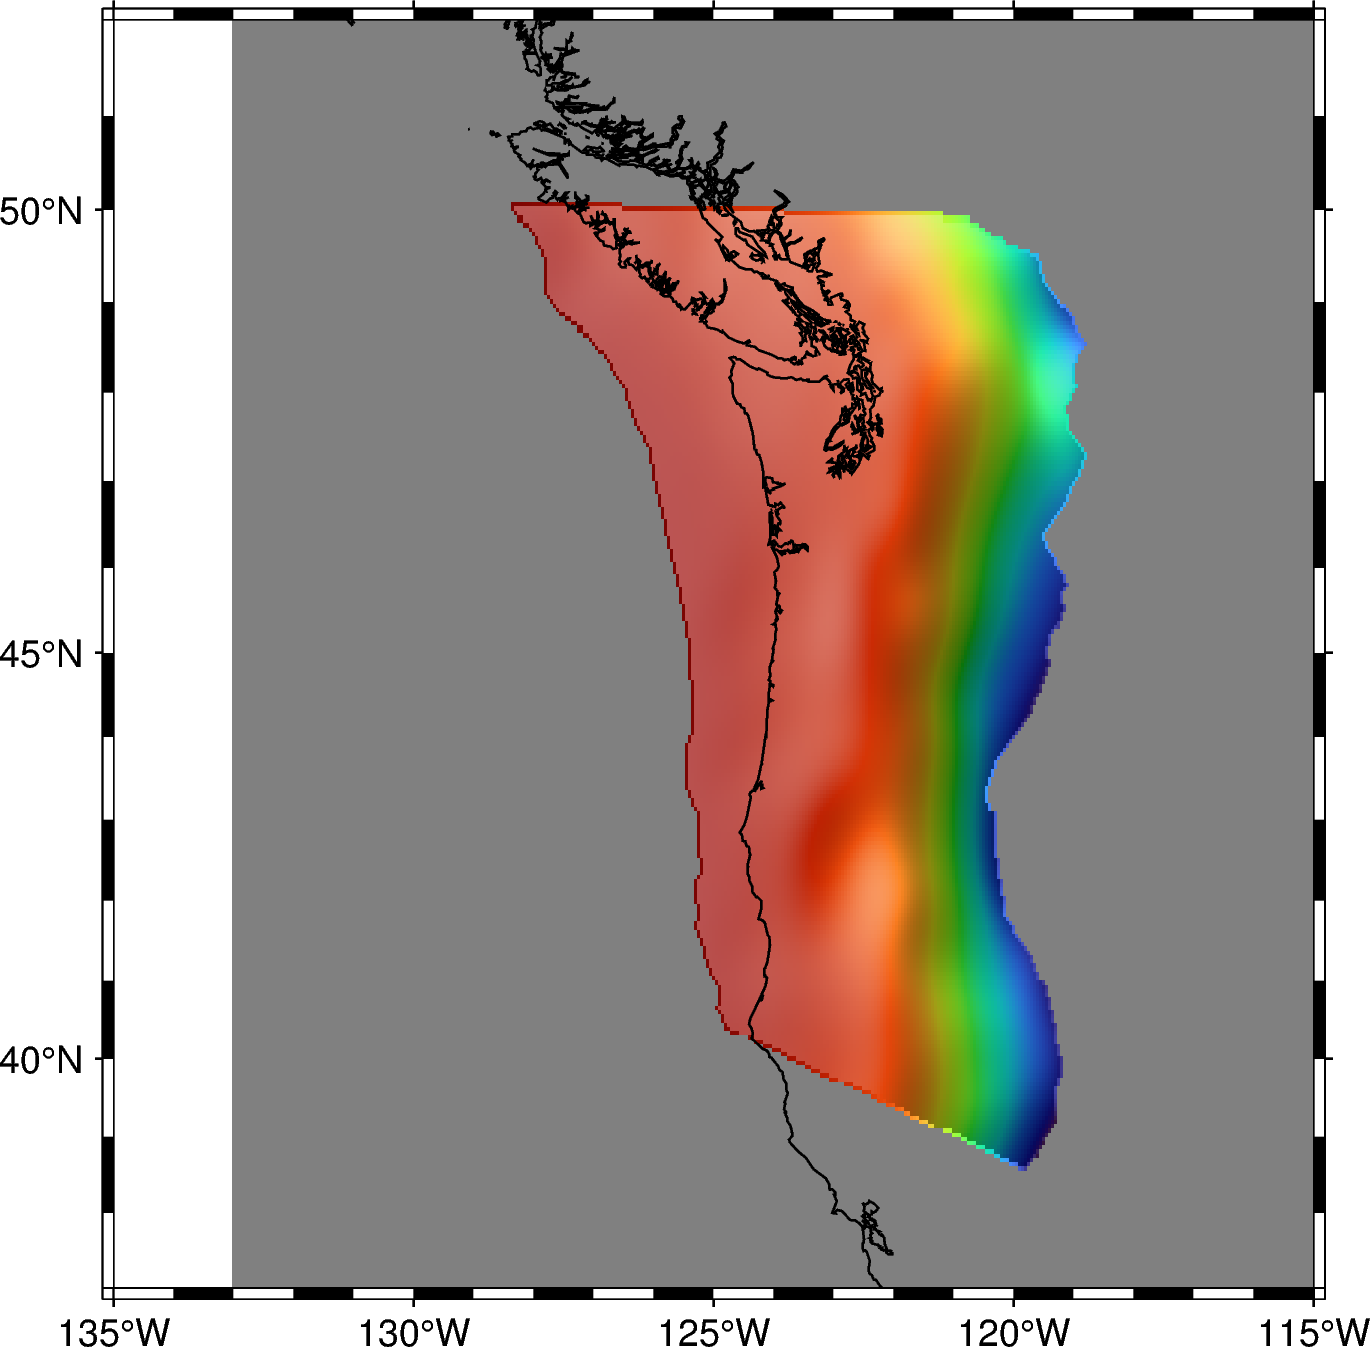

In [58]:
minlat = 37
maxlat = 52
minlon = -135 
maxlon = -115
fig = pygmt.Figure()
fig.grdimage(
    grid=slab_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )
fig.coast(shorelines="1/0.5p")

fig.show()

In [50]:
from obspy.clients.fdsn import Client
import obspy
client = Client("IRIS")

t1 = obspy.UTCDateTime(2006,7,1)
t2 = obspy.UTCDateTime(2007,7,1)

cat = client.get_events(starttime = t1, endtime = t2, minlatitude = minlat, maxlatitude = maxlat, minlongitude = minlon, maxlongitude = maxlon)

times = [ev.origins[0].time.datetime for ev in cat]
lats = [ev.origins[0].latitude for ev in cat]
lons = [ev.origins[0].longitude for ev in cat]
mags = [ev.magnitudes[0].mag for ev in cat]
depths = [ev.origins[0].depth for ev in cat]

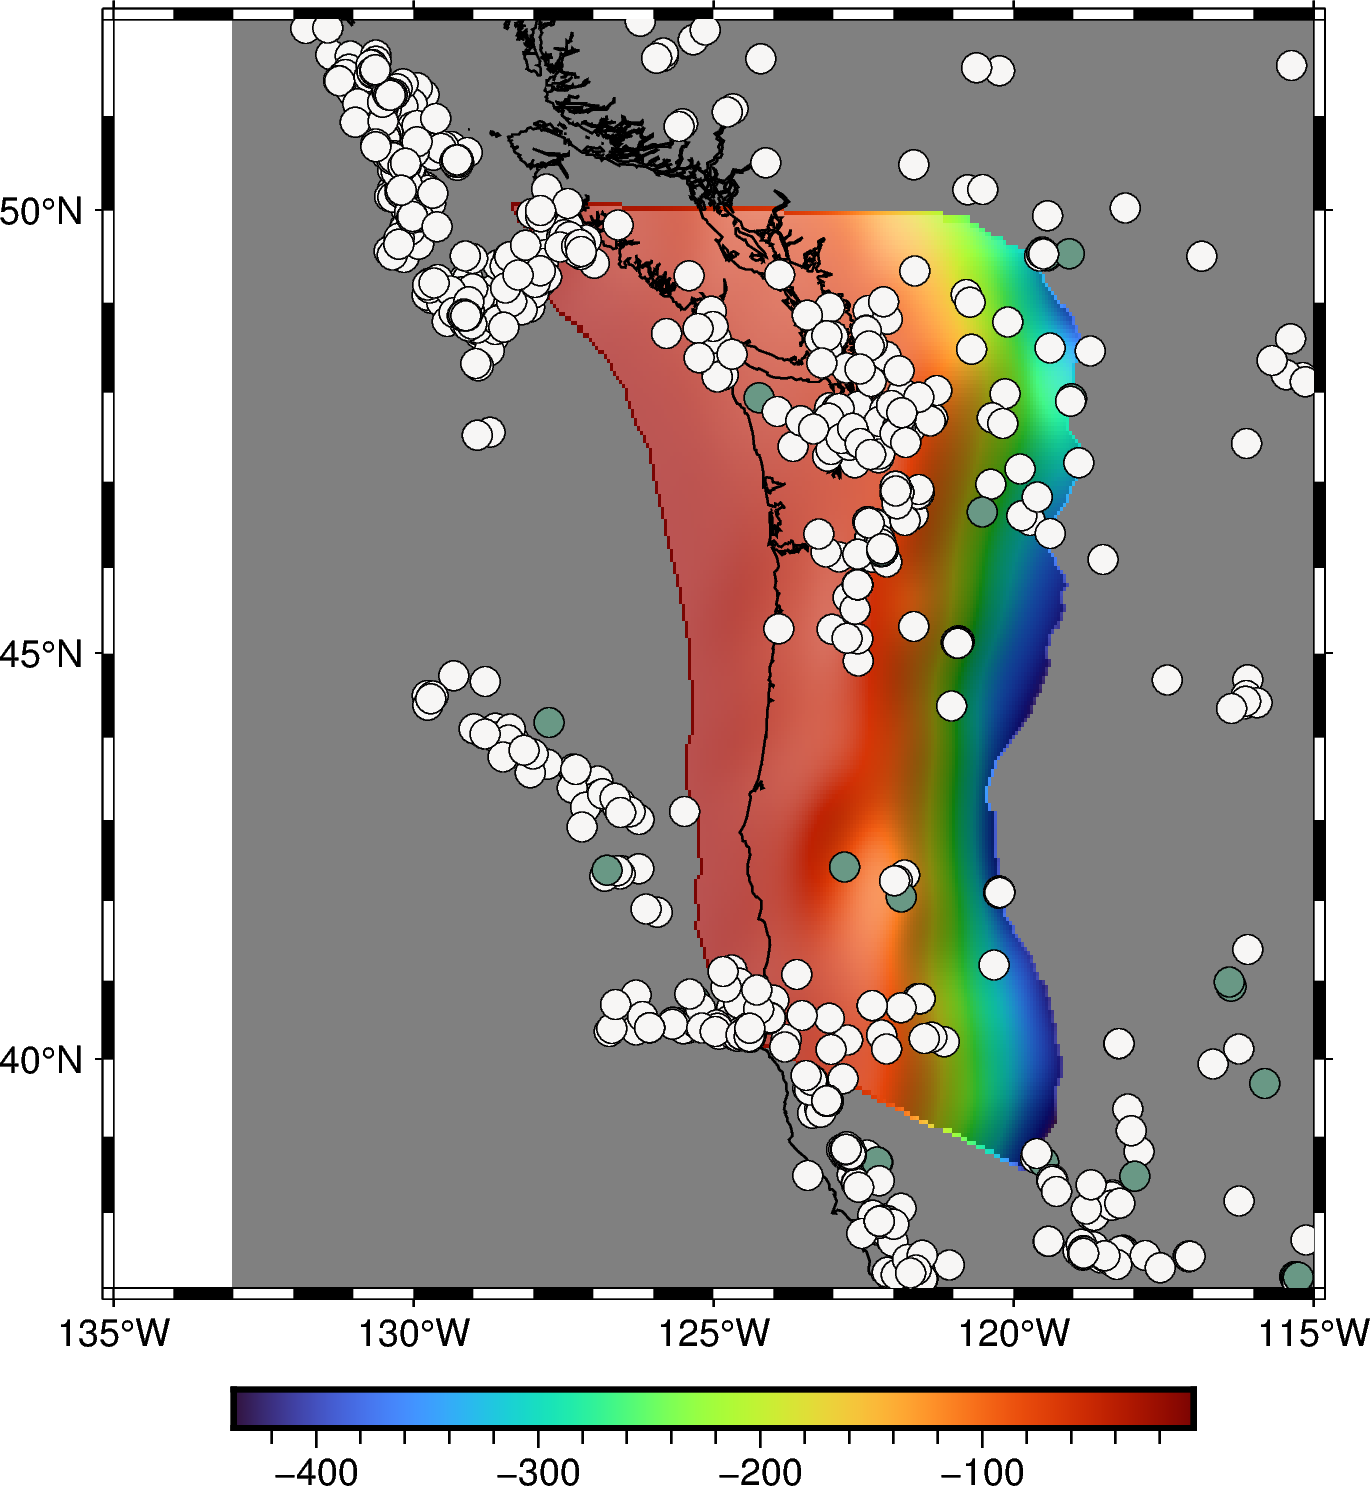

In [64]:
# plot data points
minlat = 37
maxlat = 52
minlon = -135 
maxlon = -115
fig = pygmt.Figure()
fig.grdimage(
    grid=slab_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )
fig.coast(shorelines="1/0.5p")
fig.plot(
    x=lons,
    y=lats,
    style='c0.1i',
    size=depths,
    pen='black',
    cmap="terra",
    color=depths,
)
fig.colorbar()
fig.show()

In [5]:
# make color pallets
pygmt.makecpt(
    cmap='topo',
    series='-8000/8000/1000',
    continuous=True
)

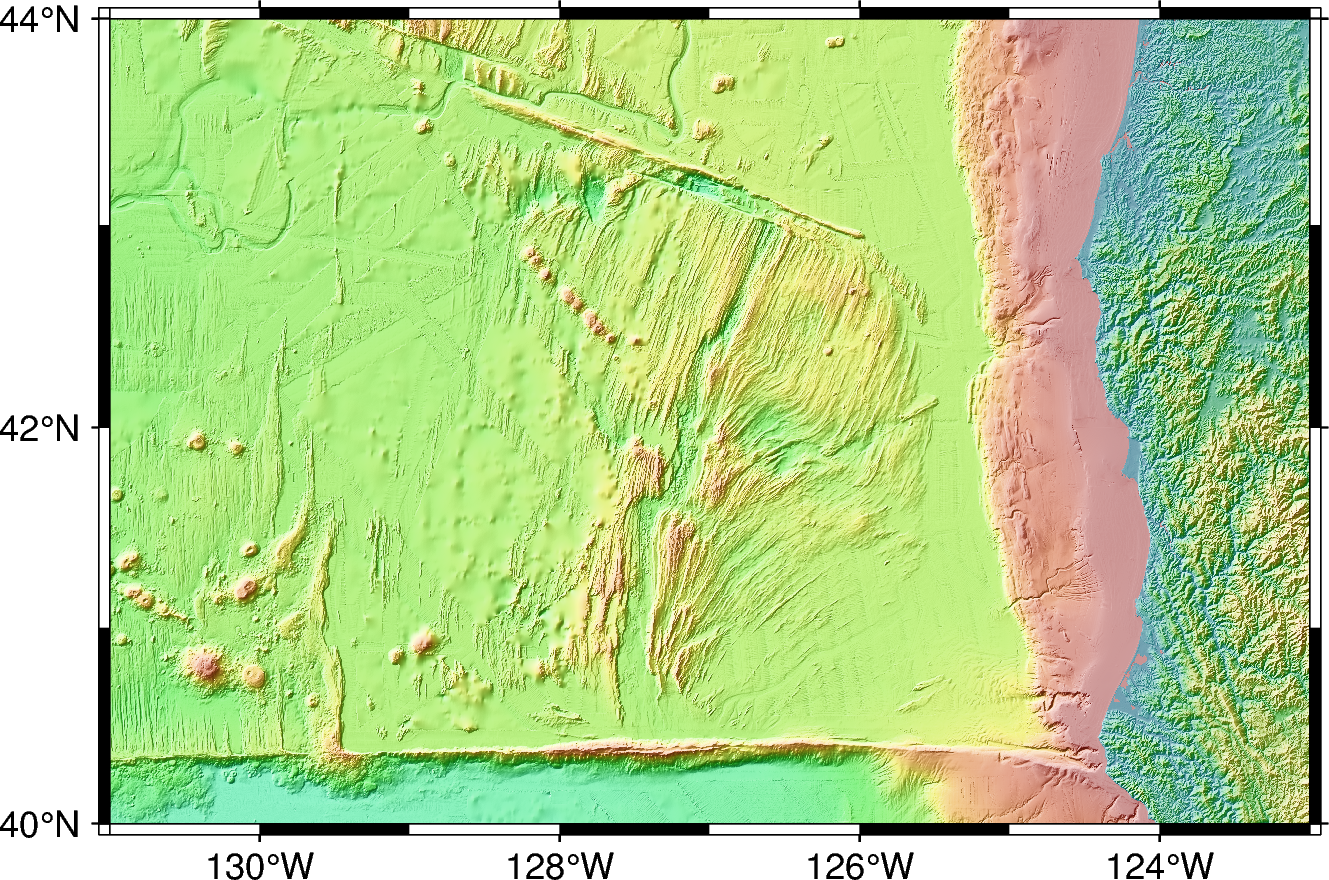

In [6]:
fig.grdimage(
    grid=topo_data,
    region=[minlon, maxlon, minlat, maxlat],
    projection='M4i',
    shading=True,
    frame=True
    )
fig.show()

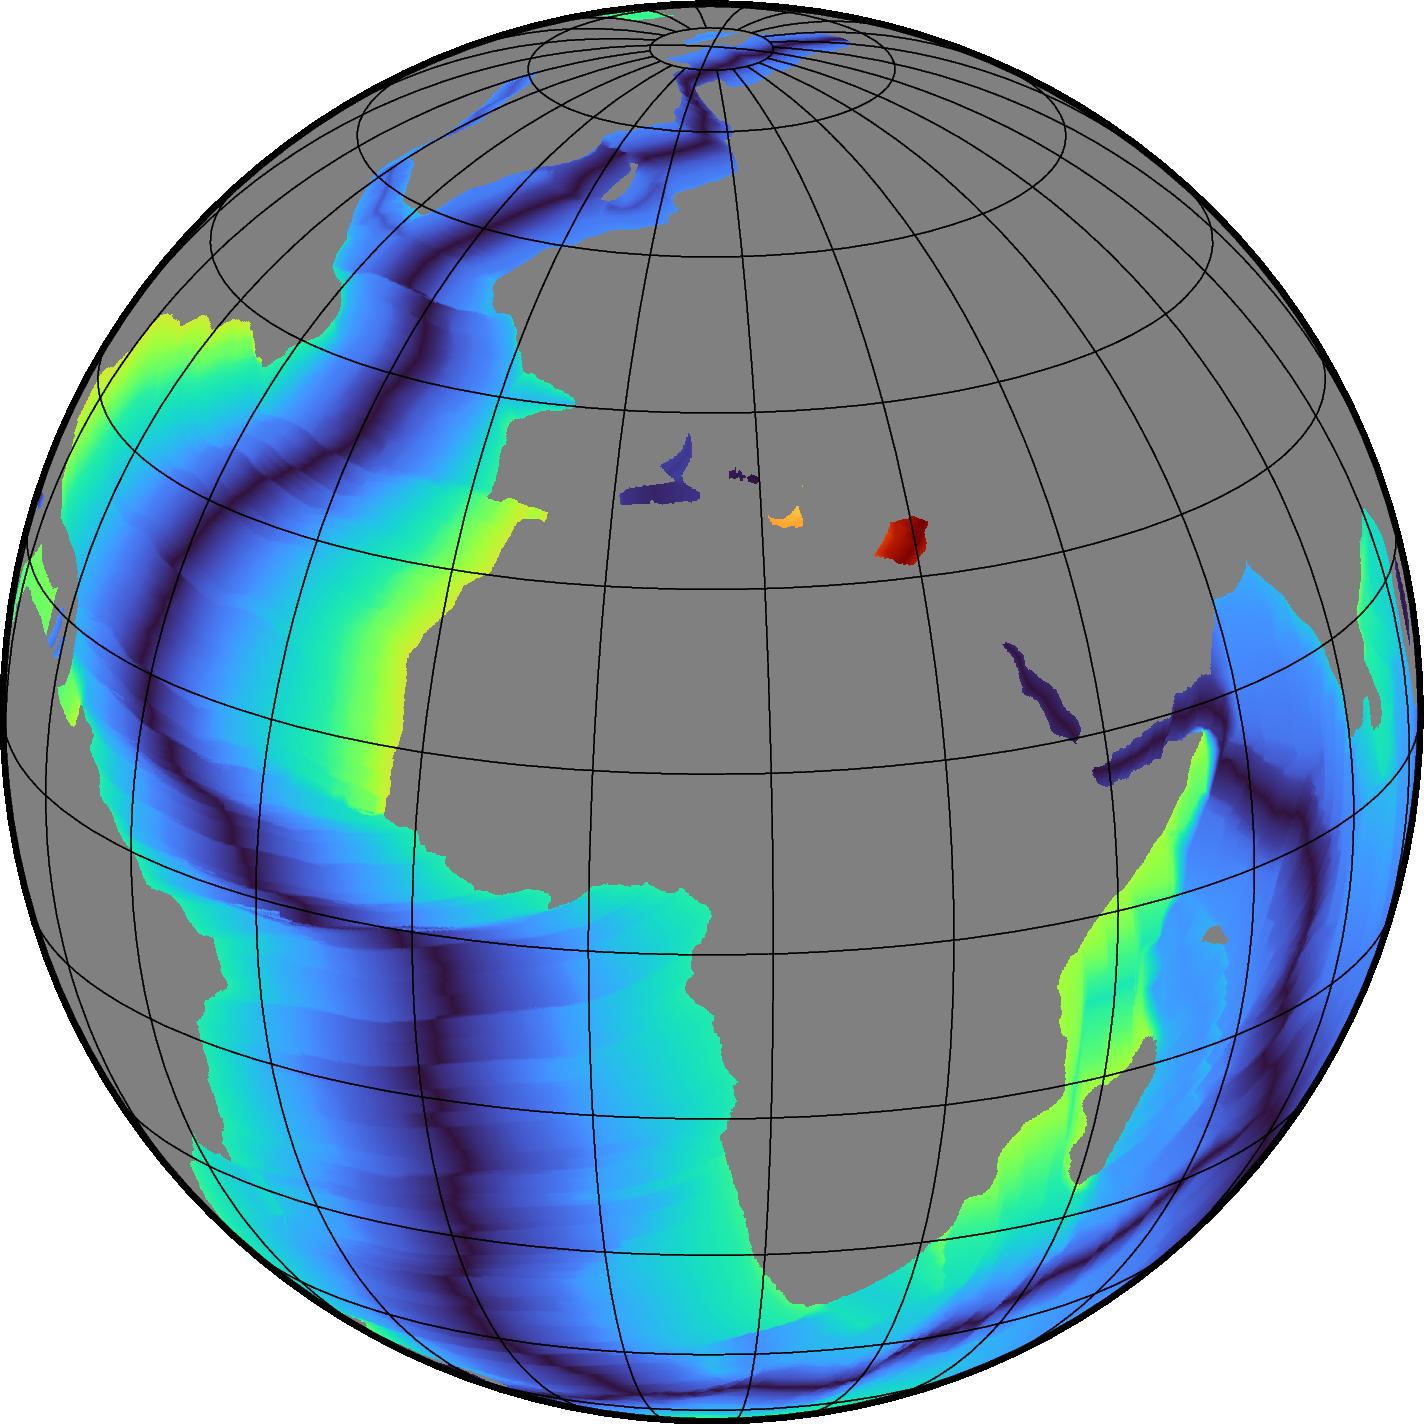

In [27]:
fig.grdimage(grid=age_data,projection="G10/20/12c", region="g", frame="g")
fig.show()

### Earthquake time!!

In [28]:
import obspy

In [29]:
from obspy.clients.fdsn import Client
import obspy
client = Client("IRIS")

t1 = obspy.UTCDateTime(2006,7,1)
t2 = obspy.UTCDateTime(2007,7,1)

cat = client.get_events(starttime = t1, endtime = t2, minlatitude = minlat, maxlatitude = maxlat, minlongitude = minlon, maxlongitude = maxlon)

times = [ev.origins[0].time.datetime for ev in cat]
lats = [ev.origins[0].latitude for ev in cat]
lons = [ev.origins[0].longitude for ev in cat]
mags = [ev.magnitudes[0].mag for ev in cat]
        

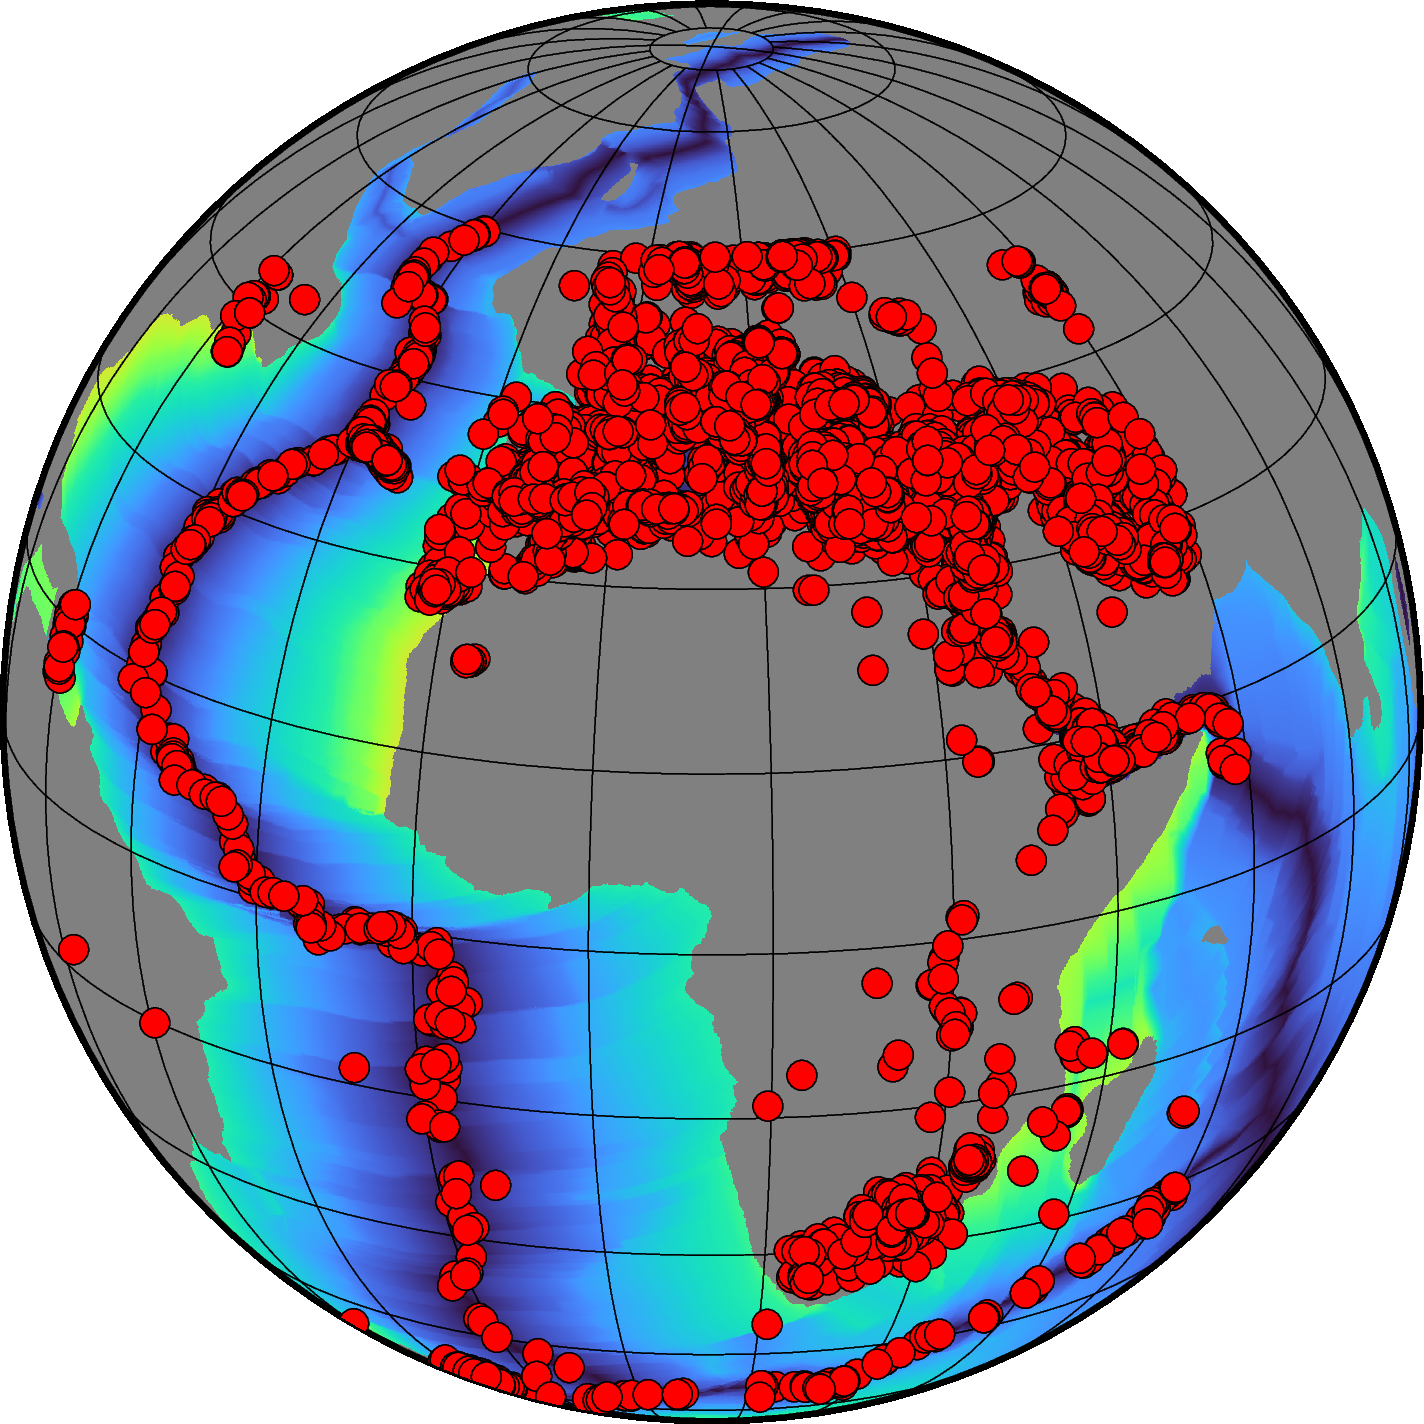

In [30]:
# plot data points
fig.plot(
    x=lons,
    y=lats,
    style='c0.1i',
    color='red',
    pen='black',
    label='something',
    )
fig.show()

In [68]:
t1 = obspy.UTCDateTime(2005,7,1)
t2 = obspy.UTCDateTime(2021,7,1)

minlat = 40
maxlat = 50
minlon = -131 
maxlon = -123

inventory = client.get_stations(network="OO",
                                starttime=t1,
                                endtime=t2,
                               minlatitude = minlat, maxlatitude = maxlat, minlongitude = minlon, maxlongitude = maxlon)

In [69]:
inventory

Inventory created at 2022-07-21T18:47:21.683000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.48
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2005-07-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			OO
		Stations (14):
			OO.AXAS1 (RSN Axial Ashes 1)
			OO.AXAS2 (RSN Axial Ashes 2)
			OO.AXBA1 (RSN Axial Base 1)
			OO.AXCC1 (RSN Axial East Caldera 1)
			OO.AXCC2 (RSN Axial Central Caldera 2)
			OO.AXEC1 (RSN Axial East Caldera 1)
			OO.AXEC2 (RSN Axial East Caldera 2)
			OO.AXEC3 (RSN Axial East Caldera 3)
			OO.AXID1 (RSN Axial International)
			OO.HYS11 (RSN Hydrate Summit 1-1)
			OO.HYS12 (RSN Hydrate Summit 1-2)
			OO.HYS13 (RSN Hydrate Summit 1-3)
			OO.HYS14 (RSN Hydrate Summit 1-4)
			OO.HYSB1 (RSN Hydrate Slope Base)
		Channels (0):


In [74]:
inventory[0].stations[0].latitude

45.933559